In [281]:
import pandas as pd
import numpy as np
import missingno as msno
import sklearn
movie_data=pd.read_csv(r"C:\Users\sargu\OneDrive\Desktop\movie_metadata.csv",skipinitialspace=True)
movie_data.shape

(5043, 28)

# DATA VIZUALIZATION

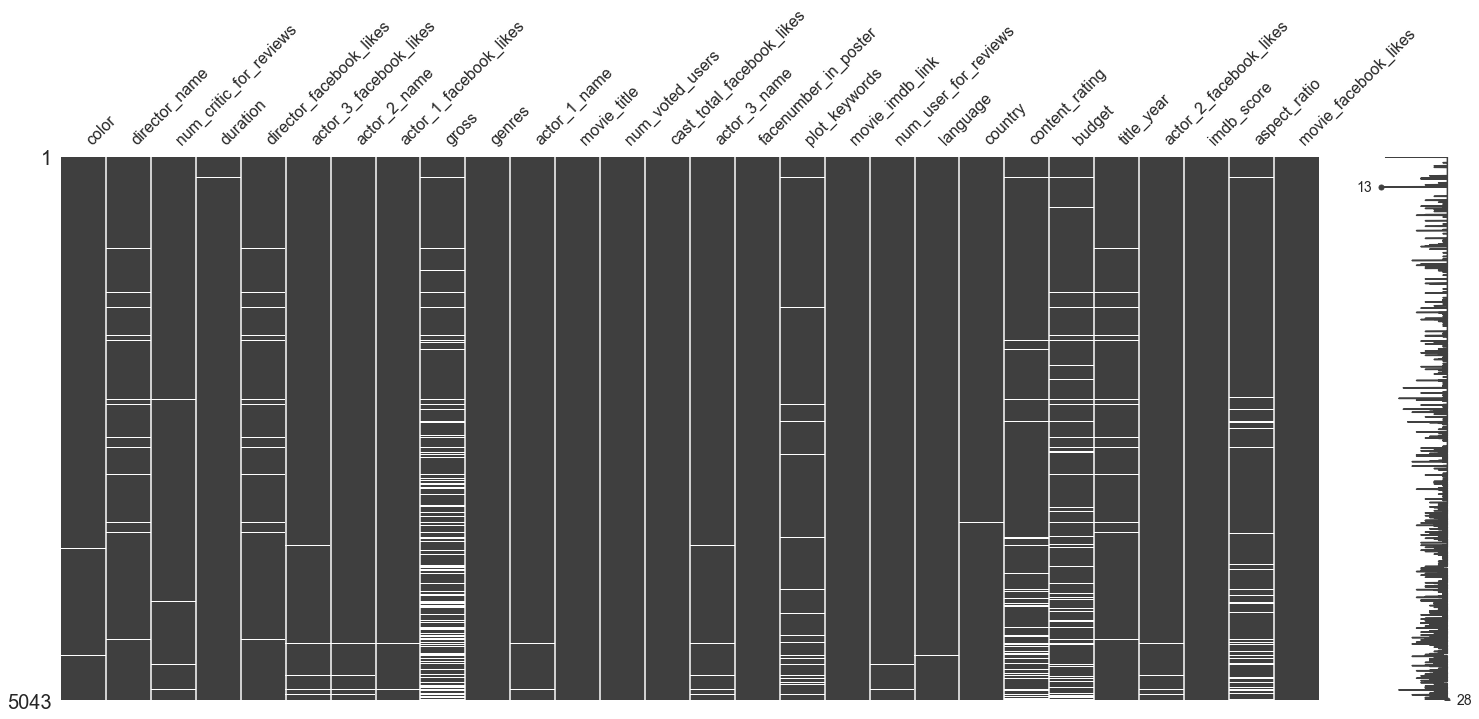

In [282]:
msno.matrix(movie_data)

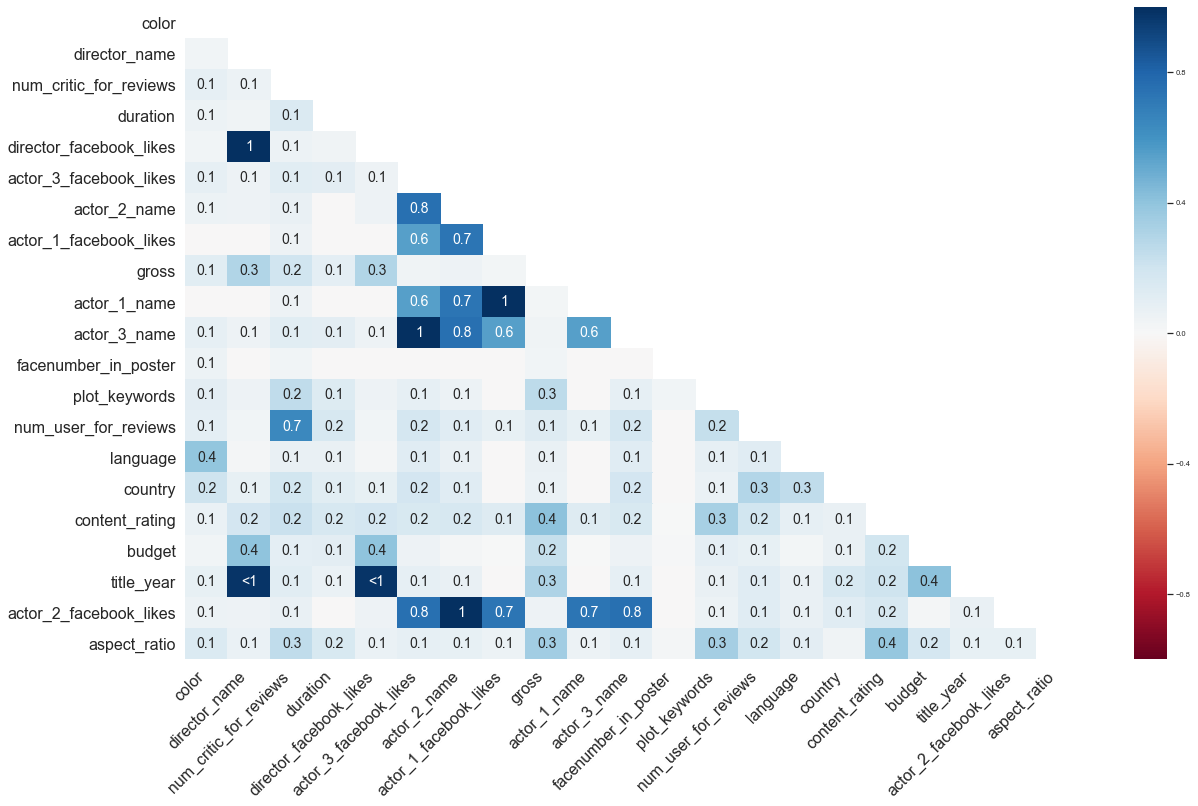

In [283]:
msno.heatmap(movie_data)

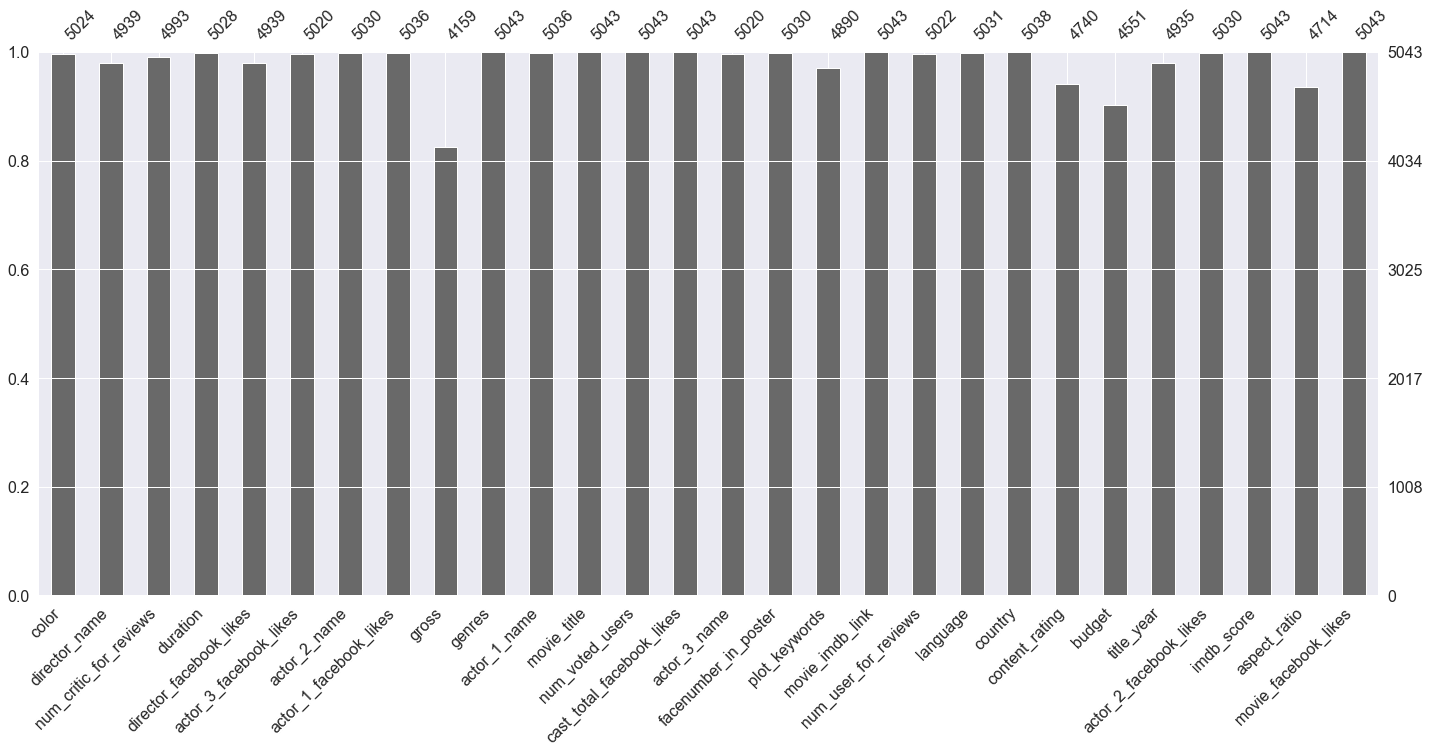

In [284]:
msno.bar(movie_data)

## DATA PREPROCESSING

First we remove the duplicate values in our dataset. 

In [285]:
movie_data = movie_data.drop_duplicates()
movie_data.shape

(4998, 28)

Handling the missing values 
We find which values are missing in our dataset and then try to deal with them. 

In [286]:
movie_data.isna()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [287]:
missing_values = pd.isnull(movie_data)
print(missing_values)

      color  director_name  num_critic_for_reviews  duration  \
0     False          False                   False     False   
1     False          False                   False     False   
2     False          False                   False     False   
3     False          False                   False     False   
4      True          False                    True      True   
5     False          False                   False     False   
6     False          False                   False     False   
7     False          False                   False     False   
8     False          False                   False     False   
9     False          False                   False     False   
10    False          False                   False     False   
11    False          False                   False     False   
12    False          False                   False     False   
13    False          False                   False     False   
14    False          False              

In [288]:
movie_data.isna().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [289]:
#Since gross and budget have the most number of missing values, we drop those rows with missing values. 
#We should not drop both columns because they are important for our analysis.
movie_data = movie_data.dropna(subset = ["gross","budget"])

In [290]:
movie_data.shape

(3857, 28)

Thus we eliminated (4998-3857)=1141 values which were not of much use to us. 

In [291]:
#Again we analyse which predictor has the most number of missing values and try to deal with it.
movie_data.isna().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

Thus as is clear, aspect_ratio has the most number of missing values. So we first try to fill those missing values with 0's.

In [292]:
movie_data["aspect_ratio"].fillna(0)

0       1.78
1       2.35
2       2.35
3       2.35
5       2.35
6       2.35
7       1.85
8       2.35
9       2.35
10      2.35
11      2.35
12      2.35
13      2.35
14      2.35
15      2.35
16      2.35
17      1.85
18      2.35
19      1.85
20      2.35
21      2.35
22      2.35
23      2.35
24      2.35
25      2.35
26      2.35
27      2.35
28      2.35
29      2.00
30      2.35
        ... 
4959    1.85
4962    1.85
4964    2.35
4971    1.85
4973    1.66
4975    1.85
4977    1.78
4978    2.35
4979    1.85
4984    1.85
4987    2.35
4997    2.35
4998    1.85
5004    2.35
5008    1.37
5009    1.37
5011    1.85
5012    1.85
5015    1.37
5021    0.00
5023    2.35
5025    1.37
5026    2.35
5027    1.85
5029    1.85
5033    1.85
5034    0.00
5035    1.37
5037    0.00
5042    1.85
Name: aspect_ratio, Length: 3857, dtype: float64

In [293]:
counts = movie_data.aspect_ratio.value_counts()
print(counts)

2.35     1995
1.85     1600
1.37       50
1.78       41
1.66       40
1.33       19
2.39       11
2.20       10
2.40        3
2.76        3
2.00        3
1.75        2
2.24        1
1.18        1
2.55        1
1.77        1
16.00       1
1.50        1
Name: aspect_ratio, dtype: int64


So the most common aspect ratios are 1.85 and 2.35. For analyzing purpose, we group other ratios together. And then we calculate the mean of imdb_score for different aspect ratios to see how important this predictor really is. 

In [294]:
asp1 = movie_data["aspect_ratio"] == 1.85
imdb_score_mean1 = movie_data.loc[asp1, 'imdb_score'].mean()
print(imdb_score_mean1)

6.373937500000018


In [295]:
asp2 = movie_data["aspect_ratio"] == 2.35
imdb_score_mean2 = movie_data.loc[asp2, 'imdb_score'].mean()
print(imdb_score_mean2)

6.508471177944862


In [296]:
asp3 = movie_data["aspect_ratio"] != 1.85
asp4 = movie_data["aspect_ratio"] != 2.35
asp_not = asp3 & asp4
imdb_score_mean3 = movie_data.loc[asp_not, 'imdb_score'].mean()
print(imdb_score_mean3)

6.672519083969459


Thus the means of imdb_score for all the different aspect ratios falls in the range of 6.35 ~ 6.7. And it doesn't really affect the imdb_score. 
Hence we can safely remove this column of aspect_ratios.

In [297]:
del movie_data["aspect_ratio"]

In [298]:
movie_data.shape

(3857, 27)

In [299]:
movie_data.isna().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

DEALING WITH 0'S IN THE DATASET
There are alot of 0's in this dataset which should be regarded as NaN's. For columns (5,6,8,14,16,25,27) with 0's, we replace them with NaN's and then replace NaN's with their respective column average. 

In [300]:
movie_data.isin([0]).sum()

color                           0
director_name                   0
num_critic_for_reviews          0
duration                        0
director_facebook_likes       673
actor_3_facebook_likes         39
actor_2_name                    0
actor_1_facebook_likes          8
gross                           0
genres                          0
actor_1_name                    0
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes      11
actor_3_name                    0
facenumber_in_poster         1631
plot_keywords                   0
movie_imdb_link                 0
num_user_for_reviews            0
language                        0
country                         0
content_rating                  0
budget                          0
title_year                      0
actor_2_facebook_likes         22
imdb_score                      0
movie_facebook_likes         1762
dtype: int64

In [301]:
#replacing 0's with NaN's
movie_data.iloc[[5,6,8,14,16,25,27]] = movie_data.loc[[5,6,8,14,16,25,27]].replace(0,np.nan)
#replacing NaN's with column means
movie_data.num_critic_for_reviews = movie_data.num_critic_for_reviews.replace(np.nan,movie_data.num_critic_for_reviews.mean())
movie_data.duration = movie_data.duration.replace(np.nan,movie_data.duration.mean())
movie_data.director_facebook_likes = movie_data.director_facebook_likes.replace(np.nan,movie_data.director_facebook_likes.mean())
movie_data.actor_3_facebook_likes = movie_data.actor_3_facebook_likes.replace(np.nan,movie_data.actor_3_facebook_likes.mean())
movie_data.actor_1_facebook_likes = movie_data.actor_1_facebook_likes.replace(np.nan,movie_data.actor_1_facebook_likes.mean())
movie_data.cast_total_facebook_likes = movie_data.cast_total_facebook_likes.replace(np.nan,movie_data.cast_total_facebook_likes.mean())
movie_data.actor_2_facebook_likes = movie_data.actor_2_facebook_likes.replace(np.nan,movie_data.actor_2_facebook_likes.mean())
movie_data.movie_facebook_likes = movie_data.movie_facebook_likes.replace(np.nan,movie_data.movie_facebook_likes.mean())
movie_data.facenumber_in_poster = movie_data.facenumber_in_poster.replace(np.nan, movie_data.facenumber_in_poster.mean())

In [302]:
#Now looking at the number of missing values
movie_data.isna().sum()

color                         8
director_name                 6
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                 11
actor_1_facebook_likes        0
gross                         6
genres                        6
actor_1_name                  9
movie_title                   6
num_voted_users               6
cast_total_facebook_likes     0
actor_3_name                 16
facenumber_in_poster          0
plot_keywords                37
movie_imdb_link               6
num_user_for_reviews          6
language                      9
country                       6
content_rating               57
budget                        6
title_year                    6
actor_2_facebook_likes        0
imdb_score                    6
movie_facebook_likes          0
dtype: int64

In [303]:
#Dealing with content_rating
movie_data["content_rating"].value_counts()

R            1723
PG-13        1310
PG            571
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [304]:
#Since for content_rating, we cannot replace the missing values with the column average, we delete the rows with missing values.
movie_data = movie_data.dropna(subset = ["content_rating"])
movie_data.shape

(3800, 27)

Remove columns 

In [305]:
#Is the color of a movie important?
movie_data.color.value_counts()

Color              3674
Black and White     124
Name: color, dtype: int64

In [306]:
#Since most of the movies are color (over 90%), thus we can safely remove this column as it does not tell us anything about imdb_score.
del movie_data["color"]

In [307]:
#language column 
movie_data.language.value_counts()

English       3638
French          34
Spanish         24
Mandarin        14
German          11
Japanese        10
Cantonese        7
Italian          7
Korean           5
Hindi            5
Portuguese       5
Norwegian        4
Persian          3
Thai             3
Dutch            3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Hebrew           2
Aramaic          1
Hungarian        1
Arabic           1
Bosnian          1
Zulu             1
Maya             1
Mongolian        1
Romanian         1
Vietnamese       1
Filipino         1
Russian          1
Czech            1
None             1
Kazakh           1
Name: language, dtype: int64

In [308]:
#Over 95% movies are in English, which means this variable is nearly constant. Let’s remove it.
del movie_data["language"]

In [309]:
movie_data.shape

(3800, 25)

As shown in the dataset, each entry of genres is combined with other genres, no movie has a single genre, which makes analysing the dataset difficult. So we see whether genres is related to imdb_score or not. If not, we'll remove the genres column. 

In [310]:
#Create a separate df containing genres and imdb_score
genresdf=movie_data[["genres","imdb_score"]]
genresdf.head()

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
5,Action|Adventure|Sci-Fi,6.6


In [311]:
#Separating the different types of genres 
genresdf = pd.concat([genresdf,genresdf.genres.str.get_dummies(sep='|')],1)
#Calculate the mean of all different genres
genresdf.mean(axis=0)

imdb_score     6.458868
Action         0.251053
Adventure      0.204474
Animation      0.051842
Biography      0.063421
Comedy         0.390526
Crime          0.186842
Documentary    0.014474
Drama          0.505000
Family         0.117105
Fantasy        0.133421
Film-Noir      0.000263
History        0.040000
Horror         0.102105
Music          0.041316
Musical        0.025526
Mystery        0.100526
Romance        0.227895
Sci-Fi         0.129474
Sport          0.039474
Thriller       0.292368
War            0.041053
Western        0.015789
dtype: float64

So, the means of all the different genres is almost between the range 0.1~0.6 and hence, doesn't really affect the imdb_score, hence, we can safely remove genres column from our dataset.

In [312]:
#removing genres column
del movie_data["genres"]

In [313]:
movie_data.shape

(3800, 24)

Removing columns based on uniqueness of names, plot keywords,

In [314]:
print(movie_data["director_name"].nunique())
print(movie_data["actor_1_name"].nunique())
print(movie_data["actor_2_name"].nunique())
print(movie_data["actor_3_name"].nunique())

1708
1472
2245
2644


In [315]:
#Since over 90% of directors and names of actors are unique, they don't affect the imdb score, we remove these columns.
del movie_data["director_name"]
del movie_data["actor_1_name"]
del movie_data["actor_2_name"]
del movie_data["actor_3_name"]

In [316]:
movie_data.shape

(3800, 20)

In [317]:
#Checking the plot keywords
movie_data["plot_keywords"].nunique()

3712

In [318]:
#Since almost over 95% plot keywords are unique, we can safely remove this column.
del movie_data["plot_keywords"]

In [319]:
#Also, movie_link is not really relevant for the imdb_score prediction, so, we can safely remove this predictor.
del movie_data["movie_imdb_link"]

In [320]:
movie_data.shape

(3800, 18)

Removing columns based on correlation

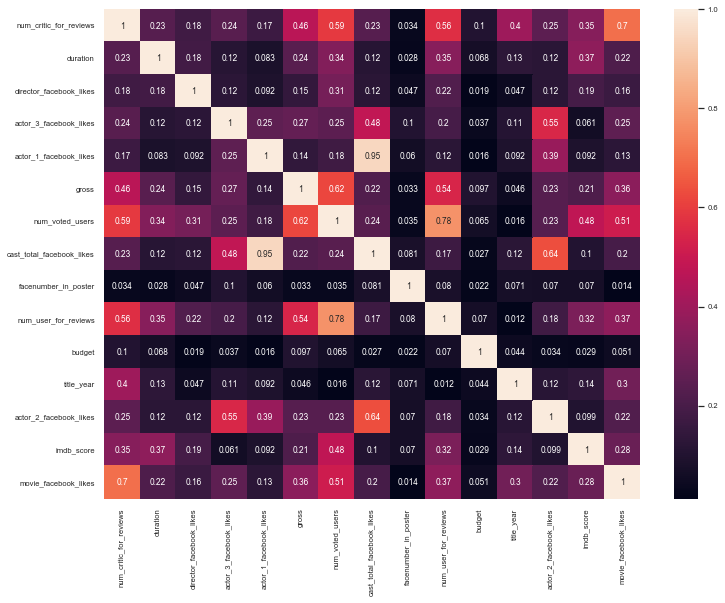

In [323]:
#Check the correlation
import seaborn as sb
import matplotlib.pyplot as plt

movie_data_corr = movie_data.corr().abs()
sb.set(font_scale = 0.695)
movie_data_corr_heatmap = sb.heatmap(movie_data_corr, annot=True)
plt.show()

Since there is high corr between actor_1_facebook_likes and cast_total_facebook_likes(0.95). Actor_2_facebook_likes(0.64) and actor_3_facebook_likes(0.48) are also highly correlated with the total likes.
So, we club these two as other_cast_facebook_likes. 

In [329]:
movie_data['other_cast_facebook_likes'] = movie_data.apply(lambda row: (row.actor_2_facebook_likes + 
                                                                        row.actor_2_facebook_likes) , axis = 1)

In [348]:
#Now we can delete the actor_2_facebook_likes column, actor_3_facebook_likes columns
del movie_data["actor_2_facebook_likes"]

In [349]:
del movie_data["actor_3_facebook_likes"]

In [355]:
del movie_data["cast_total_facebook_likes"]

Again from the heatmap, it's clear that there's a high correlation between num_critic_for_reviews, num_user_for_reviews and num_voted_users.
But we want to keep the num_voted_users column. We can add another column called ratio_of_crtic_reviews by taking the ratio of num_critic_for_reviews and num_user_for_reviews.

In [339]:
movie_data["ratio_of_critic_reviews"] = movie_data.apply(lambda row:
                                                         (row.num_critic_for_reviews/row.num_user_for_reviews) , axis = 1)

In [351]:
#Now we delete those columns
del movie_data["num_critic_for_reviews"]


In [352]:
del movie_data["num_user_for_reviews"]

In [356]:
movie_data.shape

(3800, 15)

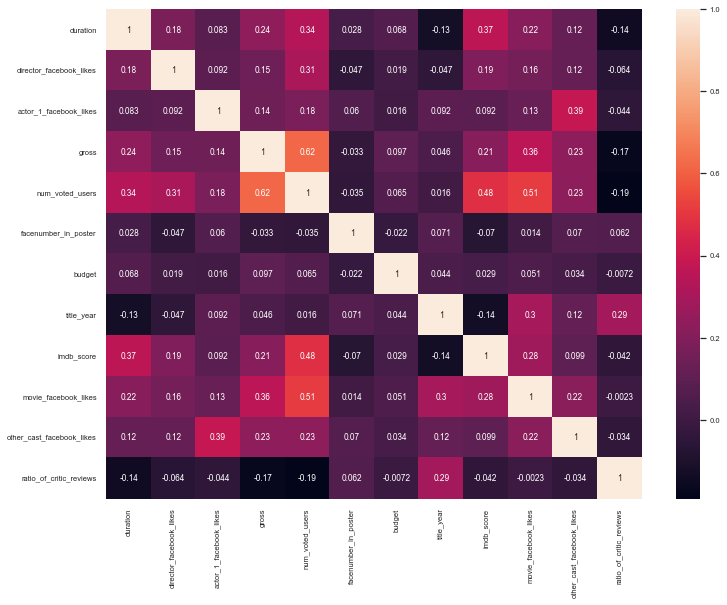

In [358]:
#Again observing the heatmap
movie_data_corr = movie_data.corr()
sb.set(font_scale = 0.688)
movie_data_corr_heatmap = sb.heatmap(movie_data_corr, annot=True)
plt.show()
#Thus no more strong correlation anymore.

CLUSTERING IMDB SCORE -
Sometimes numerical values make more sense if clustered together. This is called binning. For example, for this dataset we are trying to find out whether the movie is good or bad, so, we don't really need an exact score. We can cluster the values of imdb_score together like <4, 4-6, 6-8, 8-10, which represent the labels bad, average, good, excellent respectively. Modeling imdb_score this way will be more intuitive and will avoid overfitting.

In [359]:
def cluster(column, bin_points, labels=None):
  #Define min and max values:
  min_value = column.min()
  max_value = column.max()

  #list creation by adding minimum value and maximum value to bin_points
  break_points = [min_value] + bin_points + [max_value]
  Bin = pd.cut(column,bins=break_points,labels=labels,include_lowest=True)
  return Bin

#Binning imdb_score:
bin_points = [4,6,8]
labels = ["bad","average","good","excellent"]
movie_data["clustered_imdb_score"] = cluster(movie_data["imdb_score"], bin_points, labels)
print(pd.value_counts(movie_data["clustered_imdb_score"]))

good         2480
average      1068
excellent     157
bad            95
Name: clustered_imdb_score, dtype: int64


In [361]:
#Organizing the dataset
movie_data=movie_data[['movie_title','budget','gross','country','num_voted_users','ratio_of_critic_reviews',
                       'movie_facebook_likes','director_facebook_likes','other_cast_facebook_likes',
                       'duration','facenumber_in_poster','title_year','content_rating',
                       'imdb_score','clustered_imdb_score']]

In [362]:
movie_data.shape

(3800, 15)

Some of our columns like movie_title, country, content_rating, clustered_imdb_score contain categorical values. But they need to be in the numerical form in order to be classifed. Hence we make use of label encoding.

In [365]:
#label encoding the data
import sklearn
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder()  
movie_data['movie_title']= le.fit_transform(movie_data['movie_title']) 
movie_data['country']= le.fit_transform(movie_data['country'])
movie_data['content_rating']= le.fit_transform(movie_data['content_rating']) 
movie_data['clustered_imdb_score']= le.fit_transform(movie_data['clustered_imdb_score'])


In [369]:
#Checking how many NaN are left in the dataset after this
movie_data.isna().sum()

movie_title                  0
budget                       0
gross                        0
country                      0
num_voted_users              0
ratio_of_critic_reviews      0
movie_facebook_likes         0
director_facebook_likes      0
other_cast_facebook_likes    0
duration                     0
facenumber_in_poster         0
title_year                   0
content_rating               0
imdb_score                   0
clustered_imdb_score         0
dtype: int64

In [371]:
from sklearn import preprocessing
#Dividing dataset into label and attributes
X = movie_data.drop(['clustered_imdb_score'], axis=1)
X = movie_data.drop(['imdb_score'], axis=1)

y = movie_data['clustered_imdb_score']
normalized_X = preprocessing.scale(X)

In [372]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [373]:
#SPLIT THE DATA INTO TRAINING AND TEST DATA SETS IN THE RATIO 0F 70:30.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [374]:
lab_enc = preprocessing.LabelEncoder()
y_training_scores_encoded = lab_enc.fit_transform(y_train)
print(y_training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_training_scores_encoded))

[0 3 0 ... 0 0 3]
multiclass
multiclass
multiclass


In [375]:
y_test_scores_encoded = lab_enc.fit_transform(y_test)
print(y_test_scores_encoded)
print(utils.multiclass.type_of_target(y_test))
print(utils.multiclass.type_of_target(y_test.astype('int')))
print(utils.multiclass.type_of_target(y_test_scores_encoded))

[3 3 3 ... 3 3 3]
multiclass
multiclass
multiclass


1. Applying Decision Tree Classifier to the dataset

In [376]:
# train the dataset using decision tree algorithm  
from sklearn.tree import DecisionTreeClassifier, export_graphviz
classifier1 = DecisionTreeClassifier(criterion='entropy',max_depth=1)
classifier1


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [377]:
classifier1.fit(X_train,y_training_scores_encoded)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [378]:
#let's make predictions on the test data
y_pred_tree = classifier1.predict(X_test)


In [379]:
#Now check the accuracy of our algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test_scores_encoded, y_pred_tree))
cnf_matrix_tree = metrics.confusion_matrix(y_test_scores_encoded, y_pred_tree)
print("Confusion Matrix for Decision Tree:\n",cnf_matrix_tree)

Accuracy: 0.9482456140350877
Confusion Matrix for Decision Tree:
 [[326   0   0   0]
 [ 22   0   0   0]
 [ 37   0   0   0]
 [  0   0   0 755]]


2. Applying Logistic Regression to the dataset

In [380]:
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_training_scores_encoded)
#
y_pred_logreg=logreg.predict(X_test)

In [405]:
#Accuracy of the model
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_scores_encoded, y_pred_logreg))
cnf_matrix_logreg = metrics.confusion_matrix(y_test_scores_encoded, y_pred_logreg)

print("Confusion Matrix for Logistic Regression:\n",cnf_matrix_logreg)

Accuracy: 0.6771929824561403
Confusion Matrix for Logistic Regression:
 [[ 18   0   0 308]
 [  2   0   0  20]
 [  0   0  16  21]
 [ 13   0   4 738]]


In [384]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 2)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False False
 False  True]
[ 8 13 12  4 10  1 11  7  9  5  3  6  2  1]


4. Applying K Nearest Neighbour to the dataset

In [385]:
#First, find out the accuracies for the different values of K.
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
k_neighbors = np.arange(1,11)
training_accuracy =np.empty(len(k_neighbors))
testing_accuracy = np.empty(len(k_neighbors))

for i,k in enumerate(k_neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_training_scores_encoded)
    
    #Compute accuracy for the training set
    training_accuracy[i] = knn.score(X_train, y_training_scores_encoded)
    
    #Compute accuracy for the test set
    testing_accuracy[i] = knn.score(X_test, y_test_scores_encoded)

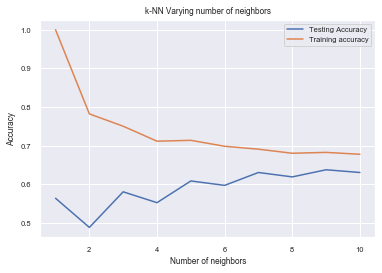

In [386]:
#Generate plot
import matplotlib.pyplot as plt
plt.title('k-NN Varying number of neighbors')
plt.plot(k_neighbors, testing_accuracy, label='Testing Accuracy')
plt.plot(k_neighbors, training_accuracy, label='Training accuracy')

plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rcParams["figure.figsize"] = [12,9]
plt.show()


In [387]:
#it's clear from the plot that for K=9 the testing accuracy is the maximum. 
#Create a knn classifier with K=9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)
#Fit the model
knn.fit(X_train,y_training_scores_encoded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [388]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print("Accuracy:",knn.score(X_test,y_test_scores_encoded))

#let us get the predictions using the classifier we had fit above
y_pred_knn = knn.predict(X_test)
print("Confusion Matrix for K Nearest Neigbour:\n",confusion_matrix(y_test_scores_encoded,y_pred_knn))

Accuracy: 0.637719298245614
Confusion Matrix for K Nearest Neigbour:
 [[ 82   0   0 244]
 [  9   0   0  13]
 [  3   0   1  33]
 [107   0   4 644]]


6. Applying Random Forest Classification to the dataset and determining the most important feature(Feature Importance)

In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

movie_labels = ['movie_title', 'budget', 'gross', 'country', 'num_voted_users','ratio_of_critic_reviews',
                'movie_facebook_likes','director_facebook_likes', 'other_cast_facebook_likes',
                'cast_total_facebook_likes', 'duration', 'facenumber_in_poster','title_year', 'content_rating']

In [398]:
# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=20000, random_state=0)

# Train the classifier
rfc.fit(X_train, y_training_scores_encoded)

# Print the name and gini importance of each feature
for feature in zip(movie_labels, rfc.feature_importances_):
    print(feature)

('movie_title', 0.0109200776683913)
('budget', 0.021422607090864472)
('gross', 0.022685586436688)
('country', 0.004538409910209821)
('num_voted_users', 0.0742115731118612)
('ratio_of_critic_reviews', 0.01940291902929325)
('movie_facebook_likes', 0.02586000725366018)
('director_facebook_likes', 0.01708496390312034)
('other_cast_facebook_likes', 0.013858520016161452)
('cast_total_facebook_likes', 0.0389253459595347)
('duration', 0.004904177384563506)
('facenumber_in_poster', 0.017046476888833217)
('title_year', 0.007863646362552426)
('content_rating', 0.7212756889842662)


Hence, from the result, we see num_voted_users is a very important attribute, while facenumber_in_poster, content_rating and country are the least important.

In [391]:
#Identify And Select Most Important Features
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05.
sfm = SelectFromModel(rfc, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_training_scores_encoded)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20000,
                                                 n_jobs=None, oob_score=False,
                                                 random_state=0, verbose=0,
   

In [392]:
# Transform the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [393]:
# Create a new random forest classifier for the most important features
rfc_important = RandomForestClassifier(n_estimators=20000, random_state=0)

# Train the new classifier on the new dataset containing the most important features
rfc_important.fit(X_important_train, y_training_scores_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Compare The Accuracy Of Full Feature Classifier To Important Feature Classifier

In [394]:
# Apply The Full Featured Classifier To The Test Data
y_pred_full = rfc.predict(X_test)

# View The Accuracy Of the Full Feature Model
print("Accuracy for the full feature Random Forest Classifier: ",accuracy_score(y_test_scores_encoded, y_pred_full))

Accuracy for the full feature Random Forest Classifier:  0.9991228070175439


In [395]:
# Apply The Important Feature Classifier To The Test Data
y_important_pred = rfc_important.predict(X_important_test)

# View The Accuracy Of the Limited Feature Model
print("Accuracy for the Limited feature Random Forest Classifier: ",accuracy_score(y_test_scores_encoded, y_important_pred))

Accuracy for the Limited feature Random Forest Classifier:  1.0


In [396]:
#Feature Importance

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.004741   0.00555967 0.00889316 0.00447465 0.02393623 0.00712244
 0.01567955 0.010717   0.00427031 0.01254627 0.00298168 0.00854231
 0.00795386 0.88258187]


In [397]:
movie_data.shape

(3800, 15)